In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
%pwd

'C:\\Users\\chelt'

In [3]:
%cd c:\\users\chelt\desktop\upwork\data science with python\task 1\

c:\users\chelt\desktop\upwork\data science with python\task 1


In [4]:
credit_df = pd.read_csv('default of credit card clients.csv', header =1)

In [5]:
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [8]:
credit_df.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

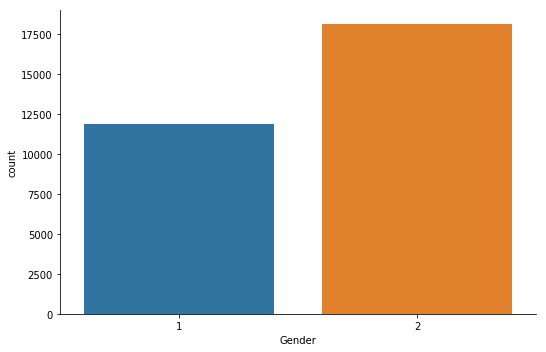

In [9]:
fg = sns.catplot('SEX', data=credit_df, kind='count', aspect=1.5)
fg.set_xlabels('Gender')

More females than males

In [10]:
credit_df.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

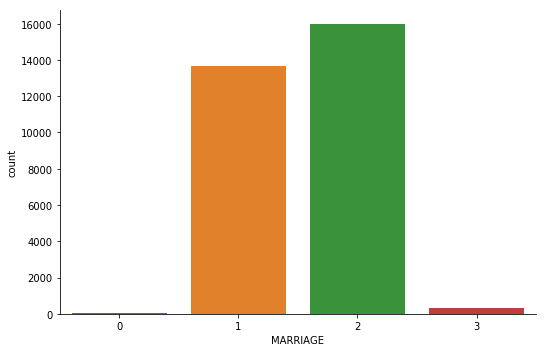

In [11]:
sns.catplot('MARRIAGE', data=credit_df, kind='count', aspect=1.5)

slightly more single than married

In [12]:
credit_df.groupby(['SEX', 'MARRIAGE'])['SEX'].count()

SEX  MARRIAGE
1    0             14
     1           5190
     2           6553
     3            131
2    0             40
     1           8469
     2           9411
     3            192
Name: SEX, dtype: int64

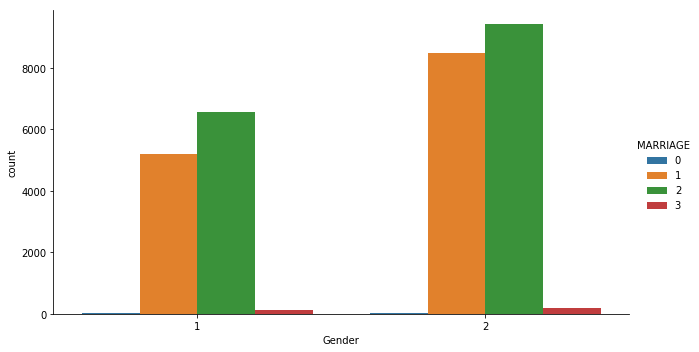

In [13]:
g = sns.catplot('SEX', data=credit_df, hue='MARRIAGE', kind='count', aspect=1.75)
g.set_xlabels('Gender')

In [14]:
credit_df.pivot_table('default payment next month', 'SEX', 'MARRIAGE', aggfunc=np.sum, margins=True)

MARRIAGE,0,1,2,3,All
SEX,,,,,
1,2,1346,1485,40,2873
2,3,1860,1856,44,3763
All,5,3206,3341,84,6636


In [15]:
defaulted = credit_df[credit_df['default payment next month']==1]

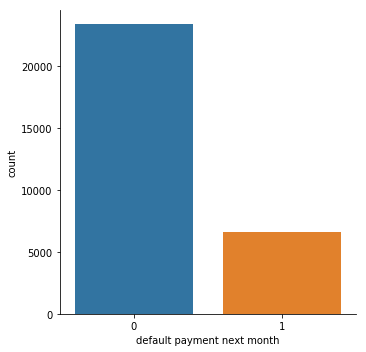

In [16]:
sns.catplot('default payment next month', data=credit_df, kind='count')

In [17]:
len(defaulted)

6636

In [18]:
defaulted.pivot_table('default payment next month', 'SEX', 'MARRIAGE', aggfunc=len, margins=True)

MARRIAGE,0,1,2,3,All
SEX,,,,,
1,2,1346,1485,40,2873
2,3,1860,1856,44,3763
All,5,3206,3341,84,6636


females higher in every category, seems like a normal distribution

In [19]:
credit_df.columns = credit_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [20]:
credit_df.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment_next_month'],
      dtype='object')

In [21]:
table = pd.crosstab(index=[credit_df.default_payment_next_month,credit_df.sex], 
                    columns=[credit_df.marriage,credit_df.education])

In [22]:
table.unstack()

marriage                    0                   1                 ...   3      \
education                   1     2      3      0        1        ...   2       
sex                         1  2  1  2   1   2  1  2     1     2  ...   1   2   
default_payment_next_month                                        ...           
0                           1  3  1  4  10  30  2  2  1300  1653  ...  44  74   
1                           0  0  0  1   2   2  0  0   390   379  ...  19  25   

marriage                                              
education                    3      4     5     6     
sex                          1   2  1  2  1  2  1  2  
default_payment_next_month                            
0                           25  51  1  2  1  2  0  2  
1                           11  16  0  0  0  0  0  0  

[2 rows x 46 columns]

In [23]:
table.columns, table.index

(MultiIndex([(0, 1),
             (0, 2),
             (0, 3),
             (1, 0),
             (1, 1),
             (1, 2),
             (1, 3),
             (1, 4),
             (1, 5),
             (1, 6),
             (2, 0),
             (2, 1),
             (2, 2),
             (2, 3),
             (2, 4),
             (2, 5),
             (2, 6),
             (3, 1),
             (3, 2),
             (3, 3),
             (3, 4),
             (3, 5),
             (3, 6)],
            names=['marriage', 'education']), MultiIndex([(0, 1),
             (0, 2),
             (1, 1),
             (1, 2)],
            names=['default_payment_next_month', 'sex']))

In [24]:
print('Average and median age of borrowers are %0.f and %0.f years old, respectively'%(credit_df.age.mean(), 
                                                                                       credit_df.age.median()))

Average and median age of borrowers are 35 and 34 years old, respectively


In [25]:
credit_df.age.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: age, dtype: float64

In [26]:
age = credit_df['age'].dropna()

Text(0.5, 1.0, "Distribution of Borrowers' Ages")

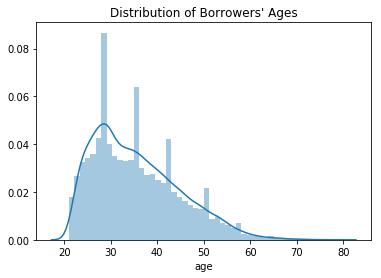

In [27]:
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Borrowers' Ages")

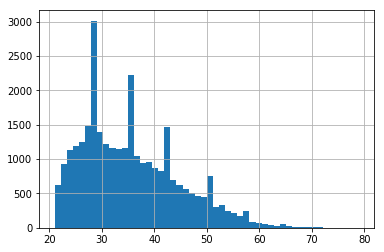

In [28]:
credit_df['age'].hist(bins=50)

In [29]:
credit_df['education'].dtype, credit_df['limit_bal'].dtype, len(credit_df.sex.dropna())

(dtype('int64'), dtype('int64'), 30000)

In [30]:
# Create a function to define those who are young adults (less than 30)
def old_young_borrower(id):
    age, sex = id
    
    if age < 30:
        return 'young adult'
    else:
        return sex

In [31]:
credit_df['person'] = credit_df[['age', 'sex']].apply(old_young_borrower, axis=1)

In [32]:
credit_df[:10]

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month,person
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,young adult
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,young adult
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,2
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,2
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,1
5,6,50000,1,1,2,37,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,0,1
6,7,500000,1,1,2,29,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,0,young adult
7,8,100000,2,2,2,23,0,-1,-1,0,...,-159,567,380,601,0,581,1687,1542,0,young adult
8,9,140000,2,3,1,28,0,0,2,0,...,11793,3719,3329,0,432,1000,1000,1000,0,young adult
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,13007,13912,0,0,0,13007,1122,0,0,1


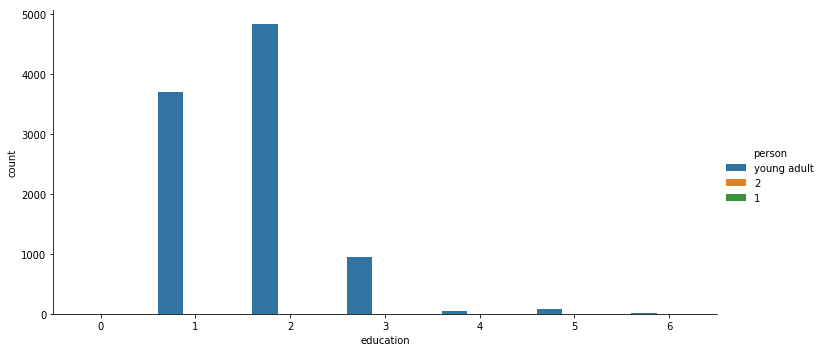

In [34]:
sns.catplot('education', data=credit_df, kind='count', hue='person', 
               hue_order=['young adult','2','1'], aspect=2)

In [35]:
credit_df['person'].value_counts()

2              11775
young adult     9618
1               8607
Name: person, dtype: int64

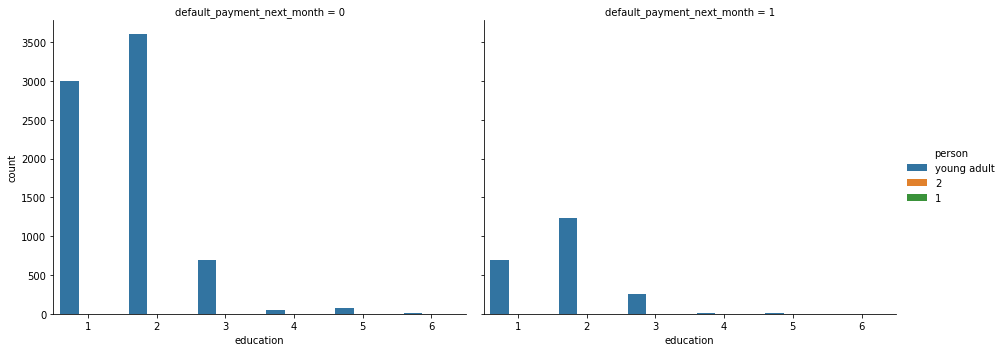

In [36]:
sns.catplot('education', data=credit_df, kind='count', hue='person', col='default_payment_next_month', order=[1,2,3,4,5,6], 
               hue_order=['young adult','2','1'], aspect=1.25, height=5)

kde plot, Distribution of Passengers' Ages

Grouped by Gende

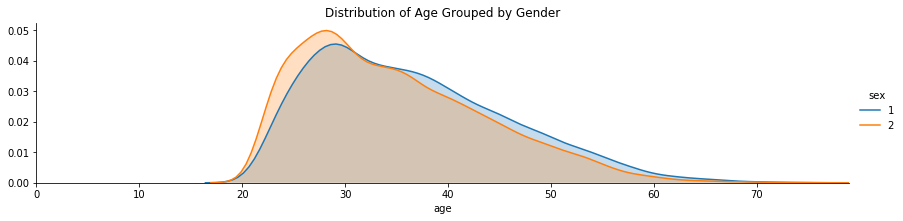

In [37]:
fig = sns.FacetGrid(credit_df, hue='sex', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = credit_df['age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

mostly even

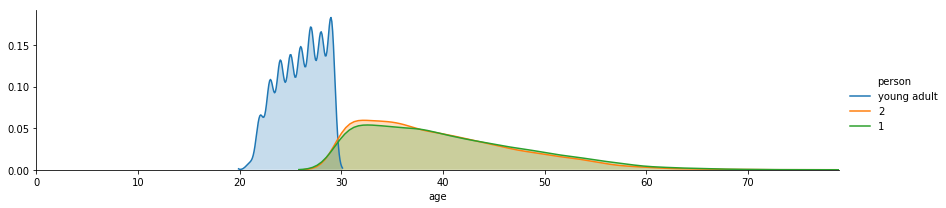

In [38]:
fig = sns.FacetGrid(credit_df, hue='person', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = credit_df['age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

C:\Users\chelt\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\chelt\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


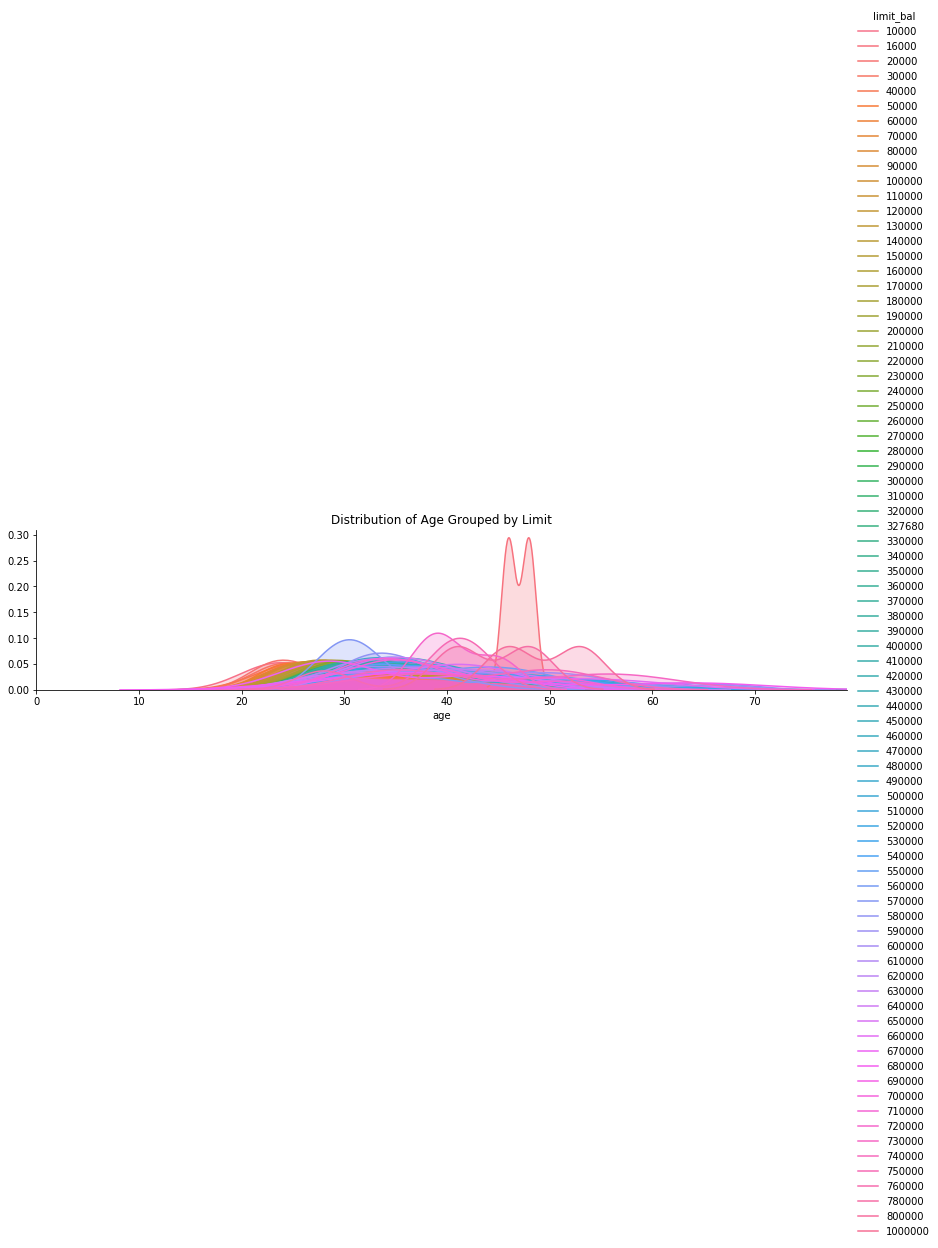

In [39]:
fig = sns.FacetGrid(credit_df, hue='limit_bal', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = credit_df['age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Limit')
fig.add_legend()

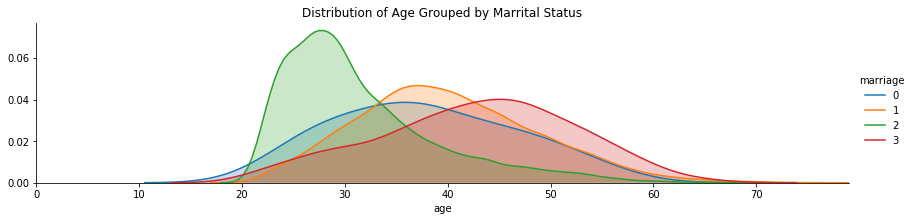

In [40]:
fig = sns.FacetGrid(credit_df, hue='marriage', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = credit_df['age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Marrital Status')
fig.add_legend()

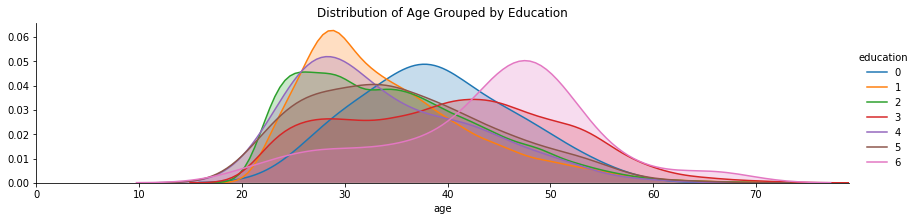

In [41]:
fig = sns.FacetGrid(credit_df, hue='education', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = credit_df['age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Education')
fig.add_legend()

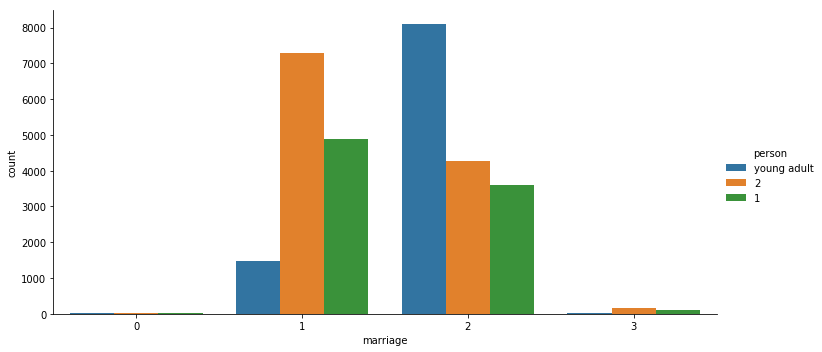

In [42]:
sns.catplot('marriage', data=credit_df, kind='count', hue='person', aspect=2)

In [47]:
# Create a new column to define marriage

In [83]:
credit_df['Marrital_status'] = credit_df.marriage.map({1:'married', 2:'single', 3:'other', 0:'other'})

In [48]:
# Create a new column to define default

In [49]:
credit_df['default_status'] = credit_df.default_payment_next_month.map({1:'yes', 0:'no'})

In [ ]:
# Create a new column to define Gender

In [51]:
credit_df['gender'] = credit_df.sex.map({1:'male', 2:'female'})

In [ ]:
# Create a new column to re-define person

In [59]:
credit_df['person_status'] = credit_df.person.map({1:'male', 2:'female', 'young adult':'young adult'})

In [ ]:
# Create a new column to define Education

In [54]:
credit_df['education_status'] = credit_df.education.map({1:'graduate school', 2:'university', 3:'high school',4:'other'})

In [84]:
credit_df.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month,person,Marrital_status,default_status,gender,education_status,person_status
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,young adult,married,yes,female,university,young adult
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,young adult,single,yes,female,university,young adult
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,2,single,no,female,university,female
3,4,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,2,married,no,female,university,female
4,5,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,1,married,no,male,university,male


Class Factor

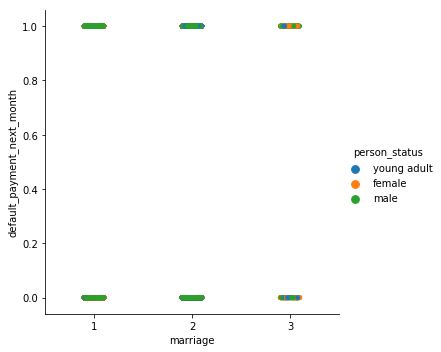

In [71]:
# defaulted vs. education Grouped by gender
sns.catplot('marriage','default_payment_next_month', hue='person_status', data=credit_df, order=range(1,4) 
               )

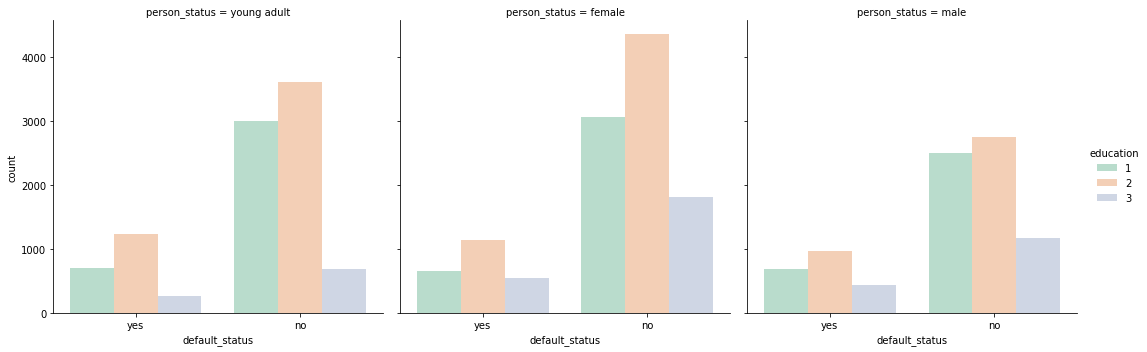

In [72]:
sns.catplot('default_status', data=credit_df, hue='education', kind='count', palette='Pastel2', hue_order=range(1,4),
              col='person_status')

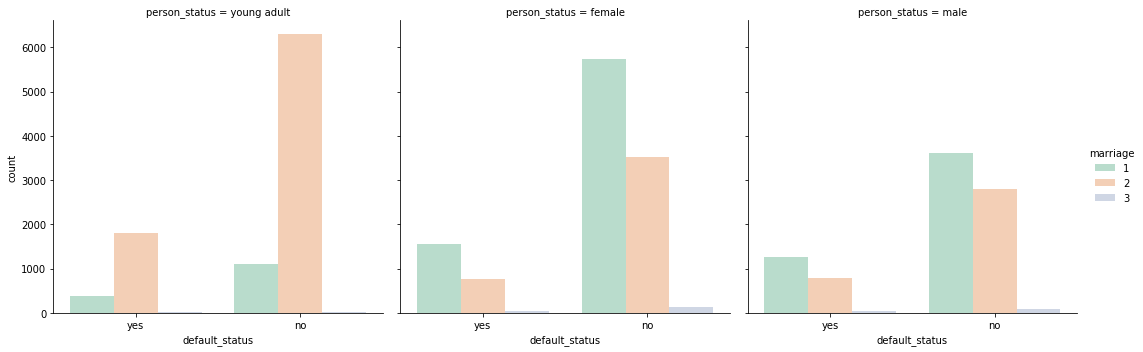

In [75]:
sns.catplot('default_status', data=credit_df, hue='marriage', kind='count', palette='Pastel2', hue_order=range(1,4),
              col='person_status')

females above 30 who are married are much more likely than males to default

young adults that are single have a much higher chance of default than married young adults

In [77]:
#age factor

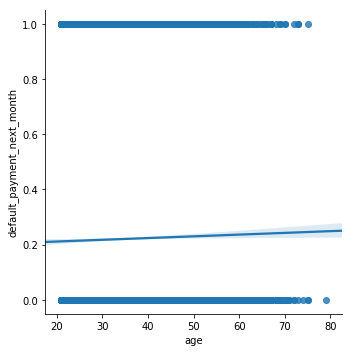

In [78]:
# Linear plot of age vs. defaulted
sns.lmplot('age', 'default_payment_next_month', data=credit_df)

there is a slightly linear relationship showing the older you are, the higher likelihood of default

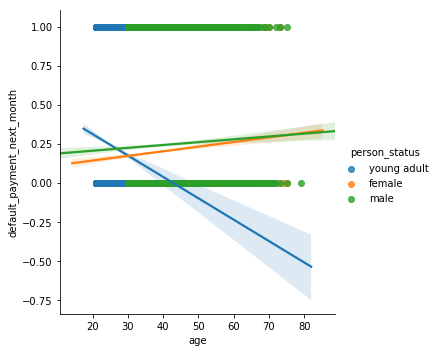

In [80]:
# Linear plot of age vs. defaulted grouped by sex
sns.lmplot('age', 'default_payment_next_month', data=credit_df, hue='person_status')

Young adults start with a very high chance of default which goes down until they are 30, 
after that, females tend to have the higher increase yoy of default

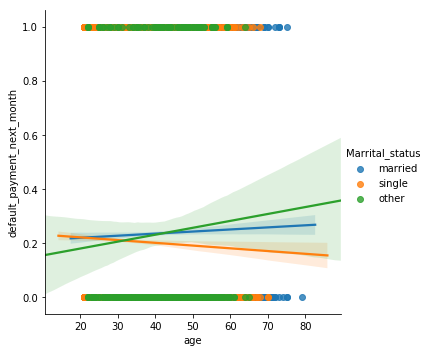

In [85]:
# Linear plot of age vs. defaulted grouped by marrital status
sns.lmplot('age', 'default_payment_next_month', data=credit_df, hue='Marrital_status')

there is an inverse relationship between single and married/other as single borrowers default less as they age

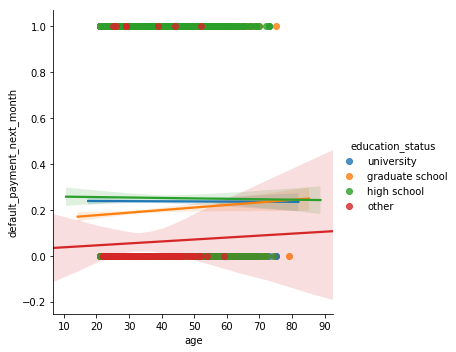

In [86]:
# Linear plot of age vs. defaulted grouped by education status
sns.lmplot('age', 'default_payment_next_month', data=credit_df, hue='education_status')

other and graduate school borrowers go up as they age

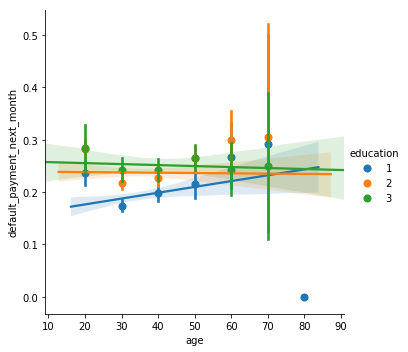

In [89]:
# Create a generation bin
generations = [0,20,30,40,50,60,70,80]
sns.lmplot('age','default_payment_next_month',hue='education',data=credit_df,x_bins=generations, hue_order=[1,2,3])

grad school borrowers are the least likely to default at a young age